## Linear noise approximation v.s exact chemical master equation
Consider following two systems :
\begin{align}
X_1 + X_2 &\leftrightarrow X_3  \qquad \qquad \qquad \; k_1:\text{forward} \quad k_0 : \text{backward}
\\
X_1 + X_2 &\leftrightarrow X_3  \; , \qquad \varnothing \leftrightarrow X_1 \quad
k_2:\text{forward} \quad k_3 : \text{backward} \quad \text{for the second reaction}
\end{align}
We would like to find steady state mean and covariance by CME and LNA respectively .

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

### First system
The propensity functions are given by

\begin{equation} f_1(X) = k_1 X_1 X_2  \qquad f_0(X)= k_1 X_3 \end{equation}

In [5]:
# rate setting
k1= 5.5
k0 =1

#time setting
t=0
t_end= 200000
t_sample = 10*max(1/k1 , 1/k0)

#initial state
X1 = 1 
X2 = 5 
X3 = 100 


In [15]:
def t_stochastic(k0,k1,X1_ini,X2_ini,X3_ini ) :
    
    #initial setting
    X1 = X1_ini
    X2 = X2_ini
    X3 = X3_ini
    t_sample = 10*max(1/k0 , 1/k1)
    t_array = np.zeros(int( t_end/t_sample) +1 )
    X1_array = np.zeros(int( t_end/t_sample) +1 )
    X2_array = np.zeros(int( t_end/t_sample) + 1)
    X3_array = np.zeros( int(t_end/t_sample) +1)
   
    j=0
    X1_array[j] = X1
    X2_array[j] = X2
    X3_array[j] = X3
    #start the process
  
    t=0
    while t < t_end :
        #compute stochastic rate
        a = [k0*X3 , k1*X1*X2 ]
        a0 = sum(a)
    
        #genertae two uniform r.vs
        r1 , r2 = np.random.rand(2)
        #update time (exclude r1=0 ) according the lemma
        while r1 ==0:
            r1 = np.random.rand(1)
        t_next = (1/a0)*(  np.log(1/r1))
        t = t + t_next
        
        #determine next reaction according the lemma
        i = 0
        mu = 0
        amu = 0 
        while amu < r2*a0 : #sum up a_i until the value exceed a0*r2
            mu = mu + 1
            amu = amu + a[i]
            i = i+1
        #update the state
        if mu == 1:
            X1 = X1+1
            X2 = X2+1
            X3 = X3-1
        elif mu ==2 :
            X1 = X1-1
            X2 = X2-1
            X3 = X3+1
        #sample the data , if t is already out of range then stop
        if t > t_end:
            print('done')
            break
        
        #here need to use while since it's possible that j+1*t_sample < t
        while t >= j*t_sample: 
            j = j+1
            t_array[j] = j
            X1_array[j] = X1
            X2_array[j] = X2
            X3_array[j] = X3
            print("now" , j ,"-th sample")
    return  t_array , X1_array , X2_array , X3_array 

In [18]:
 t_array , X1_array , X2_array , X3_array = t_stochastic(k0 = 1,k1 = 5, X1_ini = 1,X2_ini = 5,X3_ini =100 )

now 1 -th sample
now 2 -th sample
now 3 -th sample
now 4 -th sample
now 5 -th sample
now 6 -th sample
now 7 -th sample
now 8 -th sample
now 9 -th sample
now 10 -th sample
now 11 -th sample
now 12 -th sample
now 13 -th sample
now 14 -th sample
now 15 -th sample
now 16 -th sample
now 17 -th sample
now 18 -th sample
now 19 -th sample
now 20 -th sample
now 21 -th sample
now 22 -th sample
now 23 -th sample
now 24 -th sample
now 25 -th sample
now 26 -th sample
now 27 -th sample
now 28 -th sample
now 29 -th sample
now 30 -th sample
now 31 -th sample
now 32 -th sample
now 33 -th sample
now 34 -th sample
now 35 -th sample
now 36 -th sample
now 37 -th sample
now 38 -th sample
now 39 -th sample
now 40 -th sample
now 41 -th sample
now 42 -th sample
now 43 -th sample
now 44 -th sample
now 45 -th sample
now 46 -th sample
now 47 -th sample
now 48 -th sample
now 49 -th sample
now 50 -th sample
now 51 -th sample
now 52 -th sample
now 53 -th sample
now 54 -th sample
now 55 -th sample
now 56 -th sample
n

now 454 -th sample
now 455 -th sample
now 456 -th sample
now 457 -th sample
now 458 -th sample
now 459 -th sample
now 460 -th sample
now 461 -th sample
now 462 -th sample
now 463 -th sample
now 464 -th sample
now 465 -th sample
now 466 -th sample
now 467 -th sample
now 468 -th sample
now 469 -th sample
now 470 -th sample
now 471 -th sample
now 472 -th sample
now 473 -th sample
now 474 -th sample
now 475 -th sample
now 476 -th sample
now 477 -th sample
now 478 -th sample
now 479 -th sample
now 480 -th sample
now 481 -th sample
now 482 -th sample
now 483 -th sample
now 484 -th sample
now 485 -th sample
now 486 -th sample
now 487 -th sample
now 488 -th sample
now 489 -th sample
now 490 -th sample
now 491 -th sample
now 492 -th sample
now 493 -th sample
now 494 -th sample
now 495 -th sample
now 496 -th sample
now 497 -th sample
now 498 -th sample
now 499 -th sample
now 500 -th sample
now 501 -th sample
now 502 -th sample
now 503 -th sample
now 504 -th sample
now 505 -th sample
now 506 -th 

now 894 -th sample
now 895 -th sample
now 896 -th sample
now 897 -th sample
now 898 -th sample
now 899 -th sample
now 900 -th sample
now 901 -th sample
now 902 -th sample
now 903 -th sample
now 904 -th sample
now 905 -th sample
now 906 -th sample
now 907 -th sample
now 908 -th sample
now 909 -th sample
now 910 -th sample
now 911 -th sample
now 912 -th sample
now 913 -th sample
now 914 -th sample
now 915 -th sample
now 916 -th sample
now 917 -th sample
now 918 -th sample
now 919 -th sample
now 920 -th sample
now 921 -th sample
now 922 -th sample
now 923 -th sample
now 924 -th sample
now 925 -th sample
now 926 -th sample
now 927 -th sample
now 928 -th sample
now 929 -th sample
now 930 -th sample
now 931 -th sample
now 932 -th sample
now 933 -th sample
now 934 -th sample
now 935 -th sample
now 936 -th sample
now 937 -th sample
now 938 -th sample
now 939 -th sample
now 940 -th sample
now 941 -th sample
now 942 -th sample
now 943 -th sample
now 944 -th sample
now 945 -th sample
now 946 -th 

now 1322 -th sample
now 1323 -th sample
now 1324 -th sample
now 1325 -th sample
now 1326 -th sample
now 1327 -th sample
now 1328 -th sample
now 1329 -th sample
now 1330 -th sample
now 1331 -th sample
now 1332 -th sample
now 1333 -th sample
now 1334 -th sample
now 1335 -th sample
now 1336 -th sample
now 1337 -th sample
now 1338 -th sample
now 1339 -th sample
now 1340 -th sample
now 1341 -th sample
now 1342 -th sample
now 1343 -th sample
now 1344 -th sample
now 1345 -th sample
now 1346 -th sample
now 1347 -th sample
now 1348 -th sample
now 1349 -th sample
now 1350 -th sample
now 1351 -th sample
now 1352 -th sample
now 1353 -th sample
now 1354 -th sample
now 1355 -th sample
now 1356 -th sample
now 1357 -th sample
now 1358 -th sample
now 1359 -th sample
now 1360 -th sample
now 1361 -th sample
now 1362 -th sample
now 1363 -th sample
now 1364 -th sample
now 1365 -th sample
now 1366 -th sample
now 1367 -th sample
now 1368 -th sample
now 1369 -th sample
now 1370 -th sample
now 1371 -th sample


now 1738 -th sample
now 1739 -th sample
now 1740 -th sample
now 1741 -th sample
now 1742 -th sample
now 1743 -th sample
now 1744 -th sample
now 1745 -th sample
now 1746 -th sample
now 1747 -th sample
now 1748 -th sample
now 1749 -th sample
now 1750 -th sample
now 1751 -th sample
now 1752 -th sample
now 1753 -th sample
now 1754 -th sample
now 1755 -th sample
now 1756 -th sample
now 1757 -th sample
now 1758 -th sample
now 1759 -th sample
now 1760 -th sample
now 1761 -th sample
now 1762 -th sample
now 1763 -th sample
now 1764 -th sample
now 1765 -th sample
now 1766 -th sample
now 1767 -th sample
now 1768 -th sample
now 1769 -th sample
now 1770 -th sample
now 1771 -th sample
now 1772 -th sample
now 1773 -th sample
now 1774 -th sample
now 1775 -th sample
now 1776 -th sample
now 1777 -th sample
now 1778 -th sample
now 1779 -th sample
now 1780 -th sample
now 1781 -th sample
now 1782 -th sample
now 1783 -th sample
now 1784 -th sample
now 1785 -th sample
now 1786 -th sample
now 1787 -th sample


now 2156 -th sample
now 2157 -th sample
now 2158 -th sample
now 2159 -th sample
now 2160 -th sample
now 2161 -th sample
now 2162 -th sample
now 2163 -th sample
now 2164 -th sample
now 2165 -th sample
now 2166 -th sample
now 2167 -th sample
now 2168 -th sample
now 2169 -th sample
now 2170 -th sample
now 2171 -th sample
now 2172 -th sample
now 2173 -th sample
now 2174 -th sample
now 2175 -th sample
now 2176 -th sample
now 2177 -th sample
now 2178 -th sample
now 2179 -th sample
now 2180 -th sample
now 2181 -th sample
now 2182 -th sample
now 2183 -th sample
now 2184 -th sample
now 2185 -th sample
now 2186 -th sample
now 2187 -th sample
now 2188 -th sample
now 2189 -th sample
now 2190 -th sample
now 2191 -th sample
now 2192 -th sample
now 2193 -th sample
now 2194 -th sample
now 2195 -th sample
now 2196 -th sample
now 2197 -th sample
now 2198 -th sample
now 2199 -th sample
now 2200 -th sample
now 2201 -th sample
now 2202 -th sample
now 2203 -th sample
now 2204 -th sample
now 2205 -th sample


now 2568 -th sample
now 2569 -th sample
now 2570 -th sample
now 2571 -th sample
now 2572 -th sample
now 2573 -th sample
now 2574 -th sample
now 2575 -th sample
now 2576 -th sample
now 2577 -th sample
now 2578 -th sample
now 2579 -th sample
now 2580 -th sample
now 2581 -th sample
now 2582 -th sample
now 2583 -th sample
now 2584 -th sample
now 2585 -th sample
now 2586 -th sample
now 2587 -th sample
now 2588 -th sample
now 2589 -th sample
now 2590 -th sample
now 2591 -th sample
now 2592 -th sample
now 2593 -th sample
now 2594 -th sample
now 2595 -th sample
now 2596 -th sample
now 2597 -th sample
now 2598 -th sample
now 2599 -th sample
now 2600 -th sample
now 2601 -th sample
now 2602 -th sample
now 2603 -th sample
now 2604 -th sample
now 2605 -th sample
now 2606 -th sample
now 2607 -th sample
now 2608 -th sample
now 2609 -th sample
now 2610 -th sample
now 2611 -th sample
now 2612 -th sample
now 2613 -th sample
now 2614 -th sample
now 2615 -th sample
now 2616 -th sample
now 2617 -th sample


now 2987 -th sample
now 2988 -th sample
now 2989 -th sample
now 2990 -th sample
now 2991 -th sample
now 2992 -th sample
now 2993 -th sample
now 2994 -th sample
now 2995 -th sample
now 2996 -th sample
now 2997 -th sample
now 2998 -th sample
now 2999 -th sample
now 3000 -th sample
now 3001 -th sample
now 3002 -th sample
now 3003 -th sample
now 3004 -th sample
now 3005 -th sample
now 3006 -th sample
now 3007 -th sample
now 3008 -th sample
now 3009 -th sample
now 3010 -th sample
now 3011 -th sample
now 3012 -th sample
now 3013 -th sample
now 3014 -th sample
now 3015 -th sample
now 3016 -th sample
now 3017 -th sample
now 3018 -th sample
now 3019 -th sample
now 3020 -th sample
now 3021 -th sample
now 3022 -th sample
now 3023 -th sample
now 3024 -th sample
now 3025 -th sample
now 3026 -th sample
now 3027 -th sample
now 3028 -th sample
now 3029 -th sample
now 3030 -th sample
now 3031 -th sample
now 3032 -th sample
now 3033 -th sample
now 3034 -th sample
now 3035 -th sample
now 3036 -th sample


now 3410 -th sample
now 3411 -th sample
now 3412 -th sample
now 3413 -th sample
now 3414 -th sample
now 3415 -th sample
now 3416 -th sample
now 3417 -th sample
now 3418 -th sample
now 3419 -th sample
now 3420 -th sample
now 3421 -th sample
now 3422 -th sample
now 3423 -th sample
now 3424 -th sample
now 3425 -th sample
now 3426 -th sample
now 3427 -th sample
now 3428 -th sample
now 3429 -th sample
now 3430 -th sample
now 3431 -th sample
now 3432 -th sample
now 3433 -th sample
now 3434 -th sample
now 3435 -th sample
now 3436 -th sample
now 3437 -th sample
now 3438 -th sample
now 3439 -th sample
now 3440 -th sample
now 3441 -th sample
now 3442 -th sample
now 3443 -th sample
now 3444 -th sample
now 3445 -th sample
now 3446 -th sample
now 3447 -th sample
now 3448 -th sample
now 3449 -th sample
now 3450 -th sample
now 3451 -th sample
now 3452 -th sample
now 3453 -th sample
now 3454 -th sample
now 3455 -th sample
now 3456 -th sample
now 3457 -th sample
now 3458 -th sample
now 3459 -th sample


now 3831 -th sample
now 3832 -th sample
now 3833 -th sample
now 3834 -th sample
now 3835 -th sample
now 3836 -th sample
now 3837 -th sample
now 3838 -th sample
now 3839 -th sample
now 3840 -th sample
now 3841 -th sample
now 3842 -th sample
now 3843 -th sample
now 3844 -th sample
now 3845 -th sample
now 3846 -th sample
now 3847 -th sample
now 3848 -th sample
now 3849 -th sample
now 3850 -th sample
now 3851 -th sample
now 3852 -th sample
now 3853 -th sample
now 3854 -th sample
now 3855 -th sample
now 3856 -th sample
now 3857 -th sample
now 3858 -th sample
now 3859 -th sample
now 3860 -th sample
now 3861 -th sample
now 3862 -th sample
now 3863 -th sample
now 3864 -th sample
now 3865 -th sample
now 3866 -th sample
now 3867 -th sample
now 3868 -th sample
now 3869 -th sample
now 3870 -th sample
now 3871 -th sample
now 3872 -th sample
now 3873 -th sample
now 3874 -th sample
now 3875 -th sample
now 3876 -th sample
now 3877 -th sample
now 3878 -th sample
now 3879 -th sample
now 3880 -th sample


now 4253 -th sample
now 4254 -th sample
now 4255 -th sample
now 4256 -th sample
now 4257 -th sample
now 4258 -th sample
now 4259 -th sample
now 4260 -th sample
now 4261 -th sample
now 4262 -th sample
now 4263 -th sample
now 4264 -th sample
now 4265 -th sample
now 4266 -th sample
now 4267 -th sample
now 4268 -th sample
now 4269 -th sample
now 4270 -th sample
now 4271 -th sample
now 4272 -th sample
now 4273 -th sample
now 4274 -th sample
now 4275 -th sample
now 4276 -th sample
now 4277 -th sample
now 4278 -th sample
now 4279 -th sample
now 4280 -th sample
now 4281 -th sample
now 4282 -th sample
now 4283 -th sample
now 4284 -th sample
now 4285 -th sample
now 4286 -th sample
now 4287 -th sample
now 4288 -th sample
now 4289 -th sample
now 4290 -th sample
now 4291 -th sample
now 4292 -th sample
now 4293 -th sample
now 4294 -th sample
now 4295 -th sample
now 4296 -th sample
now 4297 -th sample
now 4298 -th sample
now 4299 -th sample
now 4300 -th sample
now 4301 -th sample
now 4302 -th sample


now 4672 -th sample
now 4673 -th sample
now 4674 -th sample
now 4675 -th sample
now 4676 -th sample
now 4677 -th sample
now 4678 -th sample
now 4679 -th sample
now 4680 -th sample
now 4681 -th sample
now 4682 -th sample
now 4683 -th sample
now 4684 -th sample
now 4685 -th sample
now 4686 -th sample
now 4687 -th sample
now 4688 -th sample
now 4689 -th sample
now 4690 -th sample
now 4691 -th sample
now 4692 -th sample
now 4693 -th sample
now 4694 -th sample
now 4695 -th sample
now 4696 -th sample
now 4697 -th sample
now 4698 -th sample
now 4699 -th sample
now 4700 -th sample
now 4701 -th sample
now 4702 -th sample
now 4703 -th sample
now 4704 -th sample
now 4705 -th sample
now 4706 -th sample
now 4707 -th sample
now 4708 -th sample
now 4709 -th sample
now 4710 -th sample
now 4711 -th sample
now 4712 -th sample
now 4713 -th sample
now 4714 -th sample
now 4715 -th sample
now 4716 -th sample
now 4717 -th sample
now 4718 -th sample
now 4719 -th sample
now 4720 -th sample
now 4721 -th sample


now 5087 -th sample
now 5088 -th sample
now 5089 -th sample
now 5090 -th sample
now 5091 -th sample
now 5092 -th sample
now 5093 -th sample
now 5094 -th sample
now 5095 -th sample
now 5096 -th sample
now 5097 -th sample
now 5098 -th sample
now 5099 -th sample
now 5100 -th sample
now 5101 -th sample
now 5102 -th sample
now 5103 -th sample
now 5104 -th sample
now 5105 -th sample
now 5106 -th sample
now 5107 -th sample
now 5108 -th sample
now 5109 -th sample
now 5110 -th sample
now 5111 -th sample
now 5112 -th sample
now 5113 -th sample
now 5114 -th sample
now 5115 -th sample
now 5116 -th sample
now 5117 -th sample
now 5118 -th sample
now 5119 -th sample
now 5120 -th sample
now 5121 -th sample
now 5122 -th sample
now 5123 -th sample
now 5124 -th sample
now 5125 -th sample
now 5126 -th sample
now 5127 -th sample
now 5128 -th sample
now 5129 -th sample
now 5130 -th sample
now 5131 -th sample
now 5132 -th sample
now 5133 -th sample
now 5134 -th sample
now 5135 -th sample
now 5136 -th sample


now 5509 -th sample
now 5510 -th sample
now 5511 -th sample
now 5512 -th sample
now 5513 -th sample
now 5514 -th sample
now 5515 -th sample
now 5516 -th sample
now 5517 -th sample
now 5518 -th sample
now 5519 -th sample
now 5520 -th sample
now 5521 -th sample
now 5522 -th sample
now 5523 -th sample
now 5524 -th sample
now 5525 -th sample
now 5526 -th sample
now 5527 -th sample
now 5528 -th sample
now 5529 -th sample
now 5530 -th sample
now 5531 -th sample
now 5532 -th sample
now 5533 -th sample
now 5534 -th sample
now 5535 -th sample
now 5536 -th sample
now 5537 -th sample
now 5538 -th sample
now 5539 -th sample
now 5540 -th sample
now 5541 -th sample
now 5542 -th sample
now 5543 -th sample
now 5544 -th sample
now 5545 -th sample
now 5546 -th sample
now 5547 -th sample
now 5548 -th sample
now 5549 -th sample
now 5550 -th sample
now 5551 -th sample
now 5552 -th sample
now 5553 -th sample
now 5554 -th sample
now 5555 -th sample
now 5556 -th sample
now 5557 -th sample
now 5558 -th sample


now 5932 -th sample
now 5933 -th sample
now 5934 -th sample
now 5935 -th sample
now 5936 -th sample
now 5937 -th sample
now 5938 -th sample
now 5939 -th sample
now 5940 -th sample
now 5941 -th sample
now 5942 -th sample
now 5943 -th sample
now 5944 -th sample
now 5945 -th sample
now 5946 -th sample
now 5947 -th sample
now 5948 -th sample
now 5949 -th sample
now 5950 -th sample
now 5951 -th sample
now 5952 -th sample
now 5953 -th sample
now 5954 -th sample
now 5955 -th sample
now 5956 -th sample
now 5957 -th sample
now 5958 -th sample
now 5959 -th sample
now 5960 -th sample
now 5961 -th sample
now 5962 -th sample
now 5963 -th sample
now 5964 -th sample
now 5965 -th sample
now 5966 -th sample
now 5967 -th sample
now 5968 -th sample
now 5969 -th sample
now 5970 -th sample
now 5971 -th sample
now 5972 -th sample
now 5973 -th sample
now 5974 -th sample
now 5975 -th sample
now 5976 -th sample
now 5977 -th sample
now 5978 -th sample
now 5979 -th sample
now 5980 -th sample
now 5981 -th sample


now 6348 -th sample
now 6349 -th sample
now 6350 -th sample
now 6351 -th sample
now 6352 -th sample
now 6353 -th sample
now 6354 -th sample
now 6355 -th sample
now 6356 -th sample
now 6357 -th sample
now 6358 -th sample
now 6359 -th sample
now 6360 -th sample
now 6361 -th sample
now 6362 -th sample
now 6363 -th sample
now 6364 -th sample
now 6365 -th sample
now 6366 -th sample
now 6367 -th sample
now 6368 -th sample
now 6369 -th sample
now 6370 -th sample
now 6371 -th sample
now 6372 -th sample
now 6373 -th sample
now 6374 -th sample
now 6375 -th sample
now 6376 -th sample
now 6377 -th sample
now 6378 -th sample
now 6379 -th sample
now 6380 -th sample
now 6381 -th sample
now 6382 -th sample
now 6383 -th sample
now 6384 -th sample
now 6385 -th sample
now 6386 -th sample
now 6387 -th sample
now 6388 -th sample
now 6389 -th sample
now 6390 -th sample
now 6391 -th sample
now 6392 -th sample
now 6393 -th sample
now 6394 -th sample
now 6395 -th sample
now 6396 -th sample
now 6397 -th sample


now 6759 -th sample
now 6760 -th sample
now 6761 -th sample
now 6762 -th sample
now 6763 -th sample
now 6764 -th sample
now 6765 -th sample
now 6766 -th sample
now 6767 -th sample
now 6768 -th sample
now 6769 -th sample
now 6770 -th sample
now 6771 -th sample
now 6772 -th sample
now 6773 -th sample
now 6774 -th sample
now 6775 -th sample
now 6776 -th sample
now 6777 -th sample
now 6778 -th sample
now 6779 -th sample
now 6780 -th sample
now 6781 -th sample
now 6782 -th sample
now 6783 -th sample
now 6784 -th sample
now 6785 -th sample
now 6786 -th sample
now 6787 -th sample
now 6788 -th sample
now 6789 -th sample
now 6790 -th sample
now 6791 -th sample
now 6792 -th sample
now 6793 -th sample
now 6794 -th sample
now 6795 -th sample
now 6796 -th sample
now 6797 -th sample
now 6798 -th sample
now 6799 -th sample
now 6800 -th sample
now 6801 -th sample
now 6802 -th sample
now 6803 -th sample
now 6804 -th sample
now 6805 -th sample
now 6806 -th sample
now 6807 -th sample
now 6808 -th sample


now 7169 -th sample
now 7170 -th sample
now 7171 -th sample
now 7172 -th sample
now 7173 -th sample
now 7174 -th sample
now 7175 -th sample
now 7176 -th sample
now 7177 -th sample
now 7178 -th sample
now 7179 -th sample
now 7180 -th sample
now 7181 -th sample
now 7182 -th sample
now 7183 -th sample
now 7184 -th sample
now 7185 -th sample
now 7186 -th sample
now 7187 -th sample
now 7188 -th sample
now 7189 -th sample
now 7190 -th sample
now 7191 -th sample
now 7192 -th sample
now 7193 -th sample
now 7194 -th sample
now 7195 -th sample
now 7196 -th sample
now 7197 -th sample
now 7198 -th sample
now 7199 -th sample
now 7200 -th sample
now 7201 -th sample
now 7202 -th sample
now 7203 -th sample
now 7204 -th sample
now 7205 -th sample
now 7206 -th sample
now 7207 -th sample
now 7208 -th sample
now 7209 -th sample
now 7210 -th sample
now 7211 -th sample
now 7212 -th sample
now 7213 -th sample
now 7214 -th sample
now 7215 -th sample
now 7216 -th sample
now 7217 -th sample
now 7218 -th sample


now 7592 -th sample
now 7593 -th sample
now 7594 -th sample
now 7595 -th sample
now 7596 -th sample
now 7597 -th sample
now 7598 -th sample
now 7599 -th sample
now 7600 -th sample
now 7601 -th sample
now 7602 -th sample
now 7603 -th sample
now 7604 -th sample
now 7605 -th sample
now 7606 -th sample
now 7607 -th sample
now 7608 -th sample
now 7609 -th sample
now 7610 -th sample
now 7611 -th sample
now 7612 -th sample
now 7613 -th sample
now 7614 -th sample
now 7615 -th sample
now 7616 -th sample
now 7617 -th sample
now 7618 -th sample
now 7619 -th sample
now 7620 -th sample
now 7621 -th sample
now 7622 -th sample
now 7623 -th sample
now 7624 -th sample
now 7625 -th sample
now 7626 -th sample
now 7627 -th sample
now 7628 -th sample
now 7629 -th sample
now 7630 -th sample
now 7631 -th sample
now 7632 -th sample
now 7633 -th sample
now 7634 -th sample
now 7635 -th sample
now 7636 -th sample
now 7637 -th sample
now 7638 -th sample
now 7639 -th sample
now 7640 -th sample
now 7641 -th sample


now 8003 -th sample
now 8004 -th sample
now 8005 -th sample
now 8006 -th sample
now 8007 -th sample
now 8008 -th sample
now 8009 -th sample
now 8010 -th sample
now 8011 -th sample
now 8012 -th sample
now 8013 -th sample
now 8014 -th sample
now 8015 -th sample
now 8016 -th sample
now 8017 -th sample
now 8018 -th sample
now 8019 -th sample
now 8020 -th sample
now 8021 -th sample
now 8022 -th sample
now 8023 -th sample
now 8024 -th sample
now 8025 -th sample
now 8026 -th sample
now 8027 -th sample
now 8028 -th sample
now 8029 -th sample
now 8030 -th sample
now 8031 -th sample
now 8032 -th sample
now 8033 -th sample
now 8034 -th sample
now 8035 -th sample
now 8036 -th sample
now 8037 -th sample
now 8038 -th sample
now 8039 -th sample
now 8040 -th sample
now 8041 -th sample
now 8042 -th sample
now 8043 -th sample
now 8044 -th sample
now 8045 -th sample
now 8046 -th sample
now 8047 -th sample
now 8048 -th sample
now 8049 -th sample
now 8050 -th sample
now 8051 -th sample
now 8052 -th sample


now 8427 -th sample
now 8428 -th sample
now 8429 -th sample
now 8430 -th sample
now 8431 -th sample
now 8432 -th sample
now 8433 -th sample
now 8434 -th sample
now 8435 -th sample
now 8436 -th sample
now 8437 -th sample
now 8438 -th sample
now 8439 -th sample
now 8440 -th sample
now 8441 -th sample
now 8442 -th sample
now 8443 -th sample
now 8444 -th sample
now 8445 -th sample
now 8446 -th sample
now 8447 -th sample
now 8448 -th sample
now 8449 -th sample
now 8450 -th sample
now 8451 -th sample
now 8452 -th sample
now 8453 -th sample
now 8454 -th sample
now 8455 -th sample
now 8456 -th sample
now 8457 -th sample
now 8458 -th sample
now 8459 -th sample
now 8460 -th sample
now 8461 -th sample
now 8462 -th sample
now 8463 -th sample
now 8464 -th sample
now 8465 -th sample
now 8466 -th sample
now 8467 -th sample
now 8468 -th sample
now 8469 -th sample
now 8470 -th sample
now 8471 -th sample
now 8472 -th sample
now 8473 -th sample
now 8474 -th sample
now 8475 -th sample
now 8476 -th sample


now 8840 -th sample
now 8841 -th sample
now 8842 -th sample
now 8843 -th sample
now 8844 -th sample
now 8845 -th sample
now 8846 -th sample
now 8847 -th sample
now 8848 -th sample
now 8849 -th sample
now 8850 -th sample
now 8851 -th sample
now 8852 -th sample
now 8853 -th sample
now 8854 -th sample
now 8855 -th sample
now 8856 -th sample
now 8857 -th sample
now 8858 -th sample
now 8859 -th sample
now 8860 -th sample
now 8861 -th sample
now 8862 -th sample
now 8863 -th sample
now 8864 -th sample
now 8865 -th sample
now 8866 -th sample
now 8867 -th sample
now 8868 -th sample
now 8869 -th sample
now 8870 -th sample
now 8871 -th sample
now 8872 -th sample
now 8873 -th sample
now 8874 -th sample
now 8875 -th sample
now 8876 -th sample
now 8877 -th sample
now 8878 -th sample
now 8879 -th sample
now 8880 -th sample
now 8881 -th sample
now 8882 -th sample
now 8883 -th sample
now 8884 -th sample
now 8885 -th sample
now 8886 -th sample
now 8887 -th sample
now 8888 -th sample
now 8889 -th sample


now 9251 -th sample
now 9252 -th sample
now 9253 -th sample
now 9254 -th sample
now 9255 -th sample
now 9256 -th sample
now 9257 -th sample
now 9258 -th sample
now 9259 -th sample
now 9260 -th sample
now 9261 -th sample
now 9262 -th sample
now 9263 -th sample
now 9264 -th sample
now 9265 -th sample
now 9266 -th sample
now 9267 -th sample
now 9268 -th sample
now 9269 -th sample
now 9270 -th sample
now 9271 -th sample
now 9272 -th sample
now 9273 -th sample
now 9274 -th sample
now 9275 -th sample
now 9276 -th sample
now 9277 -th sample
now 9278 -th sample
now 9279 -th sample
now 9280 -th sample
now 9281 -th sample
now 9282 -th sample
now 9283 -th sample
now 9284 -th sample
now 9285 -th sample
now 9286 -th sample
now 9287 -th sample
now 9288 -th sample
now 9289 -th sample
now 9290 -th sample
now 9291 -th sample
now 9292 -th sample
now 9293 -th sample
now 9294 -th sample
now 9295 -th sample
now 9296 -th sample
now 9297 -th sample
now 9298 -th sample
now 9299 -th sample
now 9300 -th sample


now 9668 -th sample
now 9669 -th sample
now 9670 -th sample
now 9671 -th sample
now 9672 -th sample
now 9673 -th sample
now 9674 -th sample
now 9675 -th sample
now 9676 -th sample
now 9677 -th sample
now 9678 -th sample
now 9679 -th sample
now 9680 -th sample
now 9681 -th sample
now 9682 -th sample
now 9683 -th sample
now 9684 -th sample
now 9685 -th sample
now 9686 -th sample
now 9687 -th sample
now 9688 -th sample
now 9689 -th sample
now 9690 -th sample
now 9691 -th sample
now 9692 -th sample
now 9693 -th sample
now 9694 -th sample
now 9695 -th sample
now 9696 -th sample
now 9697 -th sample
now 9698 -th sample
now 9699 -th sample
now 9700 -th sample
now 9701 -th sample
now 9702 -th sample
now 9703 -th sample
now 9704 -th sample
now 9705 -th sample
now 9706 -th sample
now 9707 -th sample
now 9708 -th sample
now 9709 -th sample
now 9710 -th sample
now 9711 -th sample
now 9712 -th sample
now 9713 -th sample
now 9714 -th sample
now 9715 -th sample
now 9716 -th sample
now 9717 -th sample


now 10092 -th sample
now 10093 -th sample
now 10094 -th sample
now 10095 -th sample
now 10096 -th sample
now 10097 -th sample
now 10098 -th sample
now 10099 -th sample
now 10100 -th sample
now 10101 -th sample
now 10102 -th sample
now 10103 -th sample
now 10104 -th sample
now 10105 -th sample
now 10106 -th sample
now 10107 -th sample
now 10108 -th sample
now 10109 -th sample
now 10110 -th sample
now 10111 -th sample
now 10112 -th sample
now 10113 -th sample
now 10114 -th sample
now 10115 -th sample
now 10116 -th sample
now 10117 -th sample
now 10118 -th sample
now 10119 -th sample
now 10120 -th sample
now 10121 -th sample
now 10122 -th sample
now 10123 -th sample
now 10124 -th sample
now 10125 -th sample
now 10126 -th sample
now 10127 -th sample
now 10128 -th sample
now 10129 -th sample
now 10130 -th sample
now 10131 -th sample
now 10132 -th sample
now 10133 -th sample
now 10134 -th sample
now 10135 -th sample
now 10136 -th sample
now 10137 -th sample
now 10138 -th sample
now 10139 -th

now 10492 -th sample
now 10493 -th sample
now 10494 -th sample
now 10495 -th sample
now 10496 -th sample
now 10497 -th sample
now 10498 -th sample
now 10499 -th sample
now 10500 -th sample
now 10501 -th sample
now 10502 -th sample
now 10503 -th sample
now 10504 -th sample
now 10505 -th sample
now 10506 -th sample
now 10507 -th sample
now 10508 -th sample
now 10509 -th sample
now 10510 -th sample
now 10511 -th sample
now 10512 -th sample
now 10513 -th sample
now 10514 -th sample
now 10515 -th sample
now 10516 -th sample
now 10517 -th sample
now 10518 -th sample
now 10519 -th sample
now 10520 -th sample
now 10521 -th sample
now 10522 -th sample
now 10523 -th sample
now 10524 -th sample
now 10525 -th sample
now 10526 -th sample
now 10527 -th sample
now 10528 -th sample
now 10529 -th sample
now 10530 -th sample
now 10531 -th sample
now 10532 -th sample
now 10533 -th sample
now 10534 -th sample
now 10535 -th sample
now 10536 -th sample
now 10537 -th sample
now 10538 -th sample
now 10539 -th

now 10883 -th sample
now 10884 -th sample
now 10885 -th sample
now 10886 -th sample
now 10887 -th sample
now 10888 -th sample
now 10889 -th sample
now 10890 -th sample
now 10891 -th sample
now 10892 -th sample
now 10893 -th sample
now 10894 -th sample
now 10895 -th sample
now 10896 -th sample
now 10897 -th sample
now 10898 -th sample
now 10899 -th sample
now 10900 -th sample
now 10901 -th sample
now 10902 -th sample
now 10903 -th sample
now 10904 -th sample
now 10905 -th sample
now 10906 -th sample
now 10907 -th sample
now 10908 -th sample
now 10909 -th sample
now 10910 -th sample
now 10911 -th sample
now 10912 -th sample
now 10913 -th sample
now 10914 -th sample
now 10915 -th sample
now 10916 -th sample
now 10917 -th sample
now 10918 -th sample
now 10919 -th sample
now 10920 -th sample
now 10921 -th sample
now 10922 -th sample
now 10923 -th sample
now 10924 -th sample
now 10925 -th sample
now 10926 -th sample
now 10927 -th sample
now 10928 -th sample
now 10929 -th sample
now 10930 -th

now 11277 -th sample
now 11278 -th sample
now 11279 -th sample
now 11280 -th sample
now 11281 -th sample
now 11282 -th sample
now 11283 -th sample
now 11284 -th sample
now 11285 -th sample
now 11286 -th sample
now 11287 -th sample
now 11288 -th sample
now 11289 -th sample
now 11290 -th sample
now 11291 -th sample
now 11292 -th sample
now 11293 -th sample
now 11294 -th sample
now 11295 -th sample
now 11296 -th sample
now 11297 -th sample
now 11298 -th sample
now 11299 -th sample
now 11300 -th sample
now 11301 -th sample
now 11302 -th sample
now 11303 -th sample
now 11304 -th sample
now 11305 -th sample
now 11306 -th sample
now 11307 -th sample
now 11308 -th sample
now 11309 -th sample
now 11310 -th sample
now 11311 -th sample
now 11312 -th sample
now 11313 -th sample
now 11314 -th sample
now 11315 -th sample
now 11316 -th sample
now 11317 -th sample
now 11318 -th sample
now 11319 -th sample
now 11320 -th sample
now 11321 -th sample
now 11322 -th sample
now 11323 -th sample
now 11324 -th

now 11668 -th sample
now 11669 -th sample
now 11670 -th sample
now 11671 -th sample
now 11672 -th sample
now 11673 -th sample
now 11674 -th sample
now 11675 -th sample
now 11676 -th sample
now 11677 -th sample
now 11678 -th sample
now 11679 -th sample
now 11680 -th sample
now 11681 -th sample
now 11682 -th sample
now 11683 -th sample
now 11684 -th sample
now 11685 -th sample
now 11686 -th sample
now 11687 -th sample
now 11688 -th sample
now 11689 -th sample
now 11690 -th sample
now 11691 -th sample
now 11692 -th sample
now 11693 -th sample
now 11694 -th sample
now 11695 -th sample
now 11696 -th sample
now 11697 -th sample
now 11698 -th sample
now 11699 -th sample
now 11700 -th sample
now 11701 -th sample
now 11702 -th sample
now 11703 -th sample
now 11704 -th sample
now 11705 -th sample
now 11706 -th sample
now 11707 -th sample
now 11708 -th sample
now 11709 -th sample
now 11710 -th sample
now 11711 -th sample
now 11712 -th sample
now 11713 -th sample
now 11714 -th sample
now 11715 -th

now 12066 -th sample
now 12067 -th sample
now 12068 -th sample
now 12069 -th sample
now 12070 -th sample
now 12071 -th sample
now 12072 -th sample
now 12073 -th sample
now 12074 -th sample
now 12075 -th sample
now 12076 -th sample
now 12077 -th sample
now 12078 -th sample
now 12079 -th sample
now 12080 -th sample
now 12081 -th sample
now 12082 -th sample
now 12083 -th sample
now 12084 -th sample
now 12085 -th sample
now 12086 -th sample
now 12087 -th sample
now 12088 -th sample
now 12089 -th sample
now 12090 -th sample
now 12091 -th sample
now 12092 -th sample
now 12093 -th sample
now 12094 -th sample
now 12095 -th sample
now 12096 -th sample
now 12097 -th sample
now 12098 -th sample
now 12099 -th sample
now 12100 -th sample
now 12101 -th sample
now 12102 -th sample
now 12103 -th sample
now 12104 -th sample
now 12105 -th sample
now 12106 -th sample
now 12107 -th sample
now 12108 -th sample
now 12109 -th sample
now 12110 -th sample
now 12111 -th sample
now 12112 -th sample
now 12113 -th

now 12464 -th sample
now 12465 -th sample
now 12466 -th sample
now 12467 -th sample
now 12468 -th sample
now 12469 -th sample
now 12470 -th sample
now 12471 -th sample
now 12472 -th sample
now 12473 -th sample
now 12474 -th sample
now 12475 -th sample
now 12476 -th sample
now 12477 -th sample
now 12478 -th sample
now 12479 -th sample
now 12480 -th sample
now 12481 -th sample
now 12482 -th sample
now 12483 -th sample
now 12484 -th sample
now 12485 -th sample
now 12486 -th sample
now 12487 -th sample
now 12488 -th sample
now 12489 -th sample
now 12490 -th sample
now 12491 -th sample
now 12492 -th sample
now 12493 -th sample
now 12494 -th sample
now 12495 -th sample
now 12496 -th sample
now 12497 -th sample
now 12498 -th sample
now 12499 -th sample
now 12500 -th sample
now 12501 -th sample
now 12502 -th sample
now 12503 -th sample
now 12504 -th sample
now 12505 -th sample
now 12506 -th sample
now 12507 -th sample
now 12508 -th sample
now 12509 -th sample
now 12510 -th sample
now 12511 -th

now 12856 -th sample
now 12857 -th sample
now 12858 -th sample
now 12859 -th sample
now 12860 -th sample
now 12861 -th sample
now 12862 -th sample
now 12863 -th sample
now 12864 -th sample
now 12865 -th sample
now 12866 -th sample
now 12867 -th sample
now 12868 -th sample
now 12869 -th sample
now 12870 -th sample
now 12871 -th sample
now 12872 -th sample
now 12873 -th sample
now 12874 -th sample
now 12875 -th sample
now 12876 -th sample
now 12877 -th sample
now 12878 -th sample
now 12879 -th sample
now 12880 -th sample
now 12881 -th sample
now 12882 -th sample
now 12883 -th sample
now 12884 -th sample
now 12885 -th sample
now 12886 -th sample
now 12887 -th sample
now 12888 -th sample
now 12889 -th sample
now 12890 -th sample
now 12891 -th sample
now 12892 -th sample
now 12893 -th sample
now 12894 -th sample
now 12895 -th sample
now 12896 -th sample
now 12897 -th sample
now 12898 -th sample
now 12899 -th sample
now 12900 -th sample
now 12901 -th sample
now 12902 -th sample
now 12903 -th

now 13255 -th sample
now 13256 -th sample
now 13257 -th sample
now 13258 -th sample
now 13259 -th sample
now 13260 -th sample
now 13261 -th sample
now 13262 -th sample
now 13263 -th sample
now 13264 -th sample
now 13265 -th sample
now 13266 -th sample
now 13267 -th sample
now 13268 -th sample
now 13269 -th sample
now 13270 -th sample
now 13271 -th sample
now 13272 -th sample
now 13273 -th sample
now 13274 -th sample
now 13275 -th sample
now 13276 -th sample
now 13277 -th sample
now 13278 -th sample
now 13279 -th sample
now 13280 -th sample
now 13281 -th sample
now 13282 -th sample
now 13283 -th sample
now 13284 -th sample
now 13285 -th sample
now 13286 -th sample
now 13287 -th sample
now 13288 -th sample
now 13289 -th sample
now 13290 -th sample
now 13291 -th sample
now 13292 -th sample
now 13293 -th sample
now 13294 -th sample
now 13295 -th sample
now 13296 -th sample
now 13297 -th sample
now 13298 -th sample
now 13299 -th sample
now 13300 -th sample
now 13301 -th sample
now 13302 -th

now 13660 -th sample
now 13661 -th sample
now 13662 -th sample
now 13663 -th sample
now 13664 -th sample
now 13665 -th sample
now 13666 -th sample
now 13667 -th sample
now 13668 -th sample
now 13669 -th sample
now 13670 -th sample
now 13671 -th sample
now 13672 -th sample
now 13673 -th sample
now 13674 -th sample
now 13675 -th sample
now 13676 -th sample
now 13677 -th sample
now 13678 -th sample
now 13679 -th sample
now 13680 -th sample
now 13681 -th sample
now 13682 -th sample
now 13683 -th sample
now 13684 -th sample
now 13685 -th sample
now 13686 -th sample
now 13687 -th sample
now 13688 -th sample
now 13689 -th sample
now 13690 -th sample
now 13691 -th sample
now 13692 -th sample
now 13693 -th sample
now 13694 -th sample
now 13695 -th sample
now 13696 -th sample
now 13697 -th sample
now 13698 -th sample
now 13699 -th sample
now 13700 -th sample
now 13701 -th sample
now 13702 -th sample
now 13703 -th sample
now 13704 -th sample
now 13705 -th sample
now 13706 -th sample
now 13707 -th

now 14051 -th sample
now 14052 -th sample
now 14053 -th sample
now 14054 -th sample
now 14055 -th sample
now 14056 -th sample
now 14057 -th sample
now 14058 -th sample
now 14059 -th sample
now 14060 -th sample
now 14061 -th sample
now 14062 -th sample
now 14063 -th sample
now 14064 -th sample
now 14065 -th sample
now 14066 -th sample
now 14067 -th sample
now 14068 -th sample
now 14069 -th sample
now 14070 -th sample
now 14071 -th sample
now 14072 -th sample
now 14073 -th sample
now 14074 -th sample
now 14075 -th sample
now 14076 -th sample
now 14077 -th sample
now 14078 -th sample
now 14079 -th sample
now 14080 -th sample
now 14081 -th sample
now 14082 -th sample
now 14083 -th sample
now 14084 -th sample
now 14085 -th sample
now 14086 -th sample
now 14087 -th sample
now 14088 -th sample
now 14089 -th sample
now 14090 -th sample
now 14091 -th sample
now 14092 -th sample
now 14093 -th sample
now 14094 -th sample
now 14095 -th sample
now 14096 -th sample
now 14097 -th sample
now 14098 -th

now 14446 -th sample
now 14447 -th sample
now 14448 -th sample
now 14449 -th sample
now 14450 -th sample
now 14451 -th sample
now 14452 -th sample
now 14453 -th sample
now 14454 -th sample
now 14455 -th sample
now 14456 -th sample
now 14457 -th sample
now 14458 -th sample
now 14459 -th sample
now 14460 -th sample
now 14461 -th sample
now 14462 -th sample
now 14463 -th sample
now 14464 -th sample
now 14465 -th sample
now 14466 -th sample
now 14467 -th sample
now 14468 -th sample
now 14469 -th sample
now 14470 -th sample
now 14471 -th sample
now 14472 -th sample
now 14473 -th sample
now 14474 -th sample
now 14475 -th sample
now 14476 -th sample
now 14477 -th sample
now 14478 -th sample
now 14479 -th sample
now 14480 -th sample
now 14481 -th sample
now 14482 -th sample
now 14483 -th sample
now 14484 -th sample
now 14485 -th sample
now 14486 -th sample
now 14487 -th sample
now 14488 -th sample
now 14489 -th sample
now 14490 -th sample
now 14491 -th sample
now 14492 -th sample
now 14493 -th

now 14840 -th sample
now 14841 -th sample
now 14842 -th sample
now 14843 -th sample
now 14844 -th sample
now 14845 -th sample
now 14846 -th sample
now 14847 -th sample
now 14848 -th sample
now 14849 -th sample
now 14850 -th sample
now 14851 -th sample
now 14852 -th sample
now 14853 -th sample
now 14854 -th sample
now 14855 -th sample
now 14856 -th sample
now 14857 -th sample
now 14858 -th sample
now 14859 -th sample
now 14860 -th sample
now 14861 -th sample
now 14862 -th sample
now 14863 -th sample
now 14864 -th sample
now 14865 -th sample
now 14866 -th sample
now 14867 -th sample
now 14868 -th sample
now 14869 -th sample
now 14870 -th sample
now 14871 -th sample
now 14872 -th sample
now 14873 -th sample
now 14874 -th sample
now 14875 -th sample
now 14876 -th sample
now 14877 -th sample
now 14878 -th sample
now 14879 -th sample
now 14880 -th sample
now 14881 -th sample
now 14882 -th sample
now 14883 -th sample
now 14884 -th sample
now 14885 -th sample
now 14886 -th sample
now 14887 -th

now 15238 -th sample
now 15239 -th sample
now 15240 -th sample
now 15241 -th sample
now 15242 -th sample
now 15243 -th sample
now 15244 -th sample
now 15245 -th sample
now 15246 -th sample
now 15247 -th sample
now 15248 -th sample
now 15249 -th sample
now 15250 -th sample
now 15251 -th sample
now 15252 -th sample
now 15253 -th sample
now 15254 -th sample
now 15255 -th sample
now 15256 -th sample
now 15257 -th sample
now 15258 -th sample
now 15259 -th sample
now 15260 -th sample
now 15261 -th sample
now 15262 -th sample
now 15263 -th sample
now 15264 -th sample
now 15265 -th sample
now 15266 -th sample
now 15267 -th sample
now 15268 -th sample
now 15269 -th sample
now 15270 -th sample
now 15271 -th sample
now 15272 -th sample
now 15273 -th sample
now 15274 -th sample
now 15275 -th sample
now 15276 -th sample
now 15277 -th sample
now 15278 -th sample
now 15279 -th sample
now 15280 -th sample
now 15281 -th sample
now 15282 -th sample
now 15283 -th sample
now 15284 -th sample
now 15285 -th

now 15643 -th sample
now 15644 -th sample
now 15645 -th sample
now 15646 -th sample
now 15647 -th sample
now 15648 -th sample
now 15649 -th sample
now 15650 -th sample
now 15651 -th sample
now 15652 -th sample
now 15653 -th sample
now 15654 -th sample
now 15655 -th sample
now 15656 -th sample
now 15657 -th sample
now 15658 -th sample
now 15659 -th sample
now 15660 -th sample
now 15661 -th sample
now 15662 -th sample
now 15663 -th sample
now 15664 -th sample
now 15665 -th sample
now 15666 -th sample
now 15667 -th sample
now 15668 -th sample
now 15669 -th sample
now 15670 -th sample
now 15671 -th sample
now 15672 -th sample
now 15673 -th sample
now 15674 -th sample
now 15675 -th sample
now 15676 -th sample
now 15677 -th sample
now 15678 -th sample
now 15679 -th sample
now 15680 -th sample
now 15681 -th sample
now 15682 -th sample
now 15683 -th sample
now 15684 -th sample
now 15685 -th sample
now 15686 -th sample
now 15687 -th sample
now 15688 -th sample
now 15689 -th sample
now 15690 -th

now 16039 -th sample
now 16040 -th sample
now 16041 -th sample
now 16042 -th sample
now 16043 -th sample
now 16044 -th sample
now 16045 -th sample
now 16046 -th sample
now 16047 -th sample
now 16048 -th sample
now 16049 -th sample
now 16050 -th sample
now 16051 -th sample
now 16052 -th sample
now 16053 -th sample
now 16054 -th sample
now 16055 -th sample
now 16056 -th sample
now 16057 -th sample
now 16058 -th sample
now 16059 -th sample
now 16060 -th sample
now 16061 -th sample
now 16062 -th sample
now 16063 -th sample
now 16064 -th sample
now 16065 -th sample
now 16066 -th sample
now 16067 -th sample
now 16068 -th sample
now 16069 -th sample
now 16070 -th sample
now 16071 -th sample
now 16072 -th sample
now 16073 -th sample
now 16074 -th sample
now 16075 -th sample
now 16076 -th sample
now 16077 -th sample
now 16078 -th sample
now 16079 -th sample
now 16080 -th sample
now 16081 -th sample
now 16082 -th sample
now 16083 -th sample
now 16084 -th sample
now 16085 -th sample
now 16086 -th

now 16435 -th sample
now 16436 -th sample
now 16437 -th sample
now 16438 -th sample
now 16439 -th sample
now 16440 -th sample
now 16441 -th sample
now 16442 -th sample
now 16443 -th sample
now 16444 -th sample
now 16445 -th sample
now 16446 -th sample
now 16447 -th sample
now 16448 -th sample
now 16449 -th sample
now 16450 -th sample
now 16451 -th sample
now 16452 -th sample
now 16453 -th sample
now 16454 -th sample
now 16455 -th sample
now 16456 -th sample
now 16457 -th sample
now 16458 -th sample
now 16459 -th sample
now 16460 -th sample
now 16461 -th sample
now 16462 -th sample
now 16463 -th sample
now 16464 -th sample
now 16465 -th sample
now 16466 -th sample
now 16467 -th sample
now 16468 -th sample
now 16469 -th sample
now 16470 -th sample
now 16471 -th sample
now 16472 -th sample
now 16473 -th sample
now 16474 -th sample
now 16475 -th sample
now 16476 -th sample
now 16477 -th sample
now 16478 -th sample
now 16479 -th sample
now 16480 -th sample
now 16481 -th sample
now 16482 -th

now 16832 -th sample
now 16833 -th sample
now 16834 -th sample
now 16835 -th sample
now 16836 -th sample
now 16837 -th sample
now 16838 -th sample
now 16839 -th sample
now 16840 -th sample
now 16841 -th sample
now 16842 -th sample
now 16843 -th sample
now 16844 -th sample
now 16845 -th sample
now 16846 -th sample
now 16847 -th sample
now 16848 -th sample
now 16849 -th sample
now 16850 -th sample
now 16851 -th sample
now 16852 -th sample
now 16853 -th sample
now 16854 -th sample
now 16855 -th sample
now 16856 -th sample
now 16857 -th sample
now 16858 -th sample
now 16859 -th sample
now 16860 -th sample
now 16861 -th sample
now 16862 -th sample
now 16863 -th sample
now 16864 -th sample
now 16865 -th sample
now 16866 -th sample
now 16867 -th sample
now 16868 -th sample
now 16869 -th sample
now 16870 -th sample
now 16871 -th sample
now 16872 -th sample
now 16873 -th sample
now 16874 -th sample
now 16875 -th sample
now 16876 -th sample
now 16877 -th sample
now 16878 -th sample
now 16879 -th

now 17240 -th sample
now 17241 -th sample
now 17242 -th sample
now 17243 -th sample
now 17244 -th sample
now 17245 -th sample
now 17246 -th sample
now 17247 -th sample
now 17248 -th sample
now 17249 -th sample
now 17250 -th sample
now 17251 -th sample
now 17252 -th sample
now 17253 -th sample
now 17254 -th sample
now 17255 -th sample
now 17256 -th sample
now 17257 -th sample
now 17258 -th sample
now 17259 -th sample
now 17260 -th sample
now 17261 -th sample
now 17262 -th sample
now 17263 -th sample
now 17264 -th sample
now 17265 -th sample
now 17266 -th sample
now 17267 -th sample
now 17268 -th sample
now 17269 -th sample
now 17270 -th sample
now 17271 -th sample
now 17272 -th sample
now 17273 -th sample
now 17274 -th sample
now 17275 -th sample
now 17276 -th sample
now 17277 -th sample
now 17278 -th sample
now 17279 -th sample
now 17280 -th sample
now 17281 -th sample
now 17282 -th sample
now 17283 -th sample
now 17284 -th sample
now 17285 -th sample
now 17286 -th sample
now 17287 -th

now 17651 -th sample
now 17652 -th sample
now 17653 -th sample
now 17654 -th sample
now 17655 -th sample
now 17656 -th sample
now 17657 -th sample
now 17658 -th sample
now 17659 -th sample
now 17660 -th sample
now 17661 -th sample
now 17662 -th sample
now 17663 -th sample
now 17664 -th sample
now 17665 -th sample
now 17666 -th sample
now 17667 -th sample
now 17668 -th sample
now 17669 -th sample
now 17670 -th sample
now 17671 -th sample
now 17672 -th sample
now 17673 -th sample
now 17674 -th sample
now 17675 -th sample
now 17676 -th sample
now 17677 -th sample
now 17678 -th sample
now 17679 -th sample
now 17680 -th sample
now 17681 -th sample
now 17682 -th sample
now 17683 -th sample
now 17684 -th sample
now 17685 -th sample
now 17686 -th sample
now 17687 -th sample
now 17688 -th sample
now 17689 -th sample
now 17690 -th sample
now 17691 -th sample
now 17692 -th sample
now 17693 -th sample
now 17694 -th sample
now 17695 -th sample
now 17696 -th sample
now 17697 -th sample
now 17698 -th

now 18054 -th sample
now 18055 -th sample
now 18056 -th sample
now 18057 -th sample
now 18058 -th sample
now 18059 -th sample
now 18060 -th sample
now 18061 -th sample
now 18062 -th sample
now 18063 -th sample
now 18064 -th sample
now 18065 -th sample
now 18066 -th sample
now 18067 -th sample
now 18068 -th sample
now 18069 -th sample
now 18070 -th sample
now 18071 -th sample
now 18072 -th sample
now 18073 -th sample
now 18074 -th sample
now 18075 -th sample
now 18076 -th sample
now 18077 -th sample
now 18078 -th sample
now 18079 -th sample
now 18080 -th sample
now 18081 -th sample
now 18082 -th sample
now 18083 -th sample
now 18084 -th sample
now 18085 -th sample
now 18086 -th sample
now 18087 -th sample
now 18088 -th sample
now 18089 -th sample
now 18090 -th sample
now 18091 -th sample
now 18092 -th sample
now 18093 -th sample
now 18094 -th sample
now 18095 -th sample
now 18096 -th sample
now 18097 -th sample
now 18098 -th sample
now 18099 -th sample
now 18100 -th sample
now 18101 -th

now 18452 -th sample
now 18453 -th sample
now 18454 -th sample
now 18455 -th sample
now 18456 -th sample
now 18457 -th sample
now 18458 -th sample
now 18459 -th sample
now 18460 -th sample
now 18461 -th sample
now 18462 -th sample
now 18463 -th sample
now 18464 -th sample
now 18465 -th sample
now 18466 -th sample
now 18467 -th sample
now 18468 -th sample
now 18469 -th sample
now 18470 -th sample
now 18471 -th sample
now 18472 -th sample
now 18473 -th sample
now 18474 -th sample
now 18475 -th sample
now 18476 -th sample
now 18477 -th sample
now 18478 -th sample
now 18479 -th sample
now 18480 -th sample
now 18481 -th sample
now 18482 -th sample
now 18483 -th sample
now 18484 -th sample
now 18485 -th sample
now 18486 -th sample
now 18487 -th sample
now 18488 -th sample
now 18489 -th sample
now 18490 -th sample
now 18491 -th sample
now 18492 -th sample
now 18493 -th sample
now 18494 -th sample
now 18495 -th sample
now 18496 -th sample
now 18497 -th sample
now 18498 -th sample
now 18499 -th

now 18862 -th sample
now 18863 -th sample
now 18864 -th sample
now 18865 -th sample
now 18866 -th sample
now 18867 -th sample
now 18868 -th sample
now 18869 -th sample
now 18870 -th sample
now 18871 -th sample
now 18872 -th sample
now 18873 -th sample
now 18874 -th sample
now 18875 -th sample
now 18876 -th sample
now 18877 -th sample
now 18878 -th sample
now 18879 -th sample
now 18880 -th sample
now 18881 -th sample
now 18882 -th sample
now 18883 -th sample
now 18884 -th sample
now 18885 -th sample
now 18886 -th sample
now 18887 -th sample
now 18888 -th sample
now 18889 -th sample
now 18890 -th sample
now 18891 -th sample
now 18892 -th sample
now 18893 -th sample
now 18894 -th sample
now 18895 -th sample
now 18896 -th sample
now 18897 -th sample
now 18898 -th sample
now 18899 -th sample
now 18900 -th sample
now 18901 -th sample
now 18902 -th sample
now 18903 -th sample
now 18904 -th sample
now 18905 -th sample
now 18906 -th sample
now 18907 -th sample
now 18908 -th sample
now 18909 -th

now 19263 -th sample
now 19264 -th sample
now 19265 -th sample
now 19266 -th sample
now 19267 -th sample
now 19268 -th sample
now 19269 -th sample
now 19270 -th sample
now 19271 -th sample
now 19272 -th sample
now 19273 -th sample
now 19274 -th sample
now 19275 -th sample
now 19276 -th sample
now 19277 -th sample
now 19278 -th sample
now 19279 -th sample
now 19280 -th sample
now 19281 -th sample
now 19282 -th sample
now 19283 -th sample
now 19284 -th sample
now 19285 -th sample
now 19286 -th sample
now 19287 -th sample
now 19288 -th sample
now 19289 -th sample
now 19290 -th sample
now 19291 -th sample
now 19292 -th sample
now 19293 -th sample
now 19294 -th sample
now 19295 -th sample
now 19296 -th sample
now 19297 -th sample
now 19298 -th sample
now 19299 -th sample
now 19300 -th sample
now 19301 -th sample
now 19302 -th sample
now 19303 -th sample
now 19304 -th sample
now 19305 -th sample
now 19306 -th sample
now 19307 -th sample
now 19308 -th sample
now 19309 -th sample
now 19310 -th

now 19655 -th sample
now 19656 -th sample
now 19657 -th sample
now 19658 -th sample
now 19659 -th sample
now 19660 -th sample
now 19661 -th sample
now 19662 -th sample
now 19663 -th sample
now 19664 -th sample
now 19665 -th sample
now 19666 -th sample
now 19667 -th sample
now 19668 -th sample
now 19669 -th sample
now 19670 -th sample
now 19671 -th sample
now 19672 -th sample
now 19673 -th sample
now 19674 -th sample
now 19675 -th sample
now 19676 -th sample
now 19677 -th sample
now 19678 -th sample
now 19679 -th sample
now 19680 -th sample
now 19681 -th sample
now 19682 -th sample
now 19683 -th sample
now 19684 -th sample
now 19685 -th sample
now 19686 -th sample
now 19687 -th sample
now 19688 -th sample
now 19689 -th sample
now 19690 -th sample
now 19691 -th sample
now 19692 -th sample
now 19693 -th sample
now 19694 -th sample
now 19695 -th sample
now 19696 -th sample
now 19697 -th sample
now 19698 -th sample
now 19699 -th sample
now 19700 -th sample
now 19701 -th sample
now 19702 -th

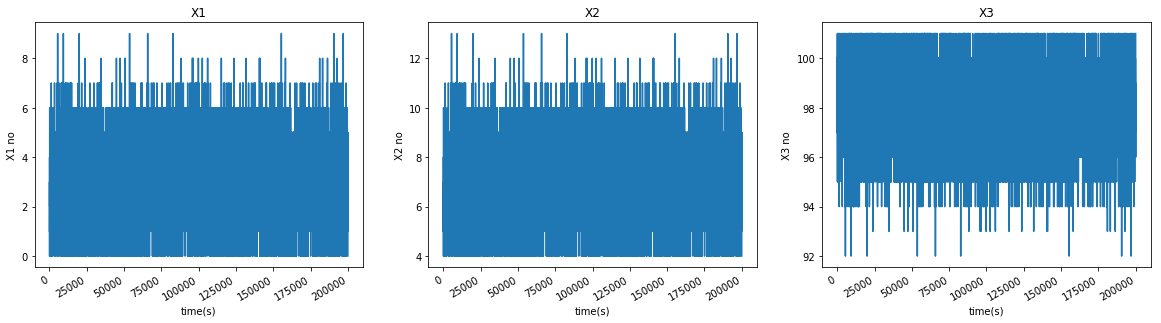

In [23]:
# plot the results
t_sample= 10*max(1/k0 , 1/k1)
fig , ax = plt.subplots(1,3 ,  figsize=(20,5))


ax[0].set_title("X1")
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('X1 no')

ax[0].plot( t_sample * t_array , X1_array , label = "random" )

ax[1].set_title("X2")
ax[1].set_xlabel('time(s)')
ax[1].set_ylabel('X2 no')

ax[1].plot( t_sample * t_array , X2_array , label = "random" )

ax[2].set_title("X3")
ax[2].set_xlabel('time(s)')
ax[2].set_ylabel('X3 no')

ax[2].plot( t_sample * t_array , X3_array , label = "random" )
fig.autofmt_xdate()
